In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive
plt.style.use('ggplot')

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

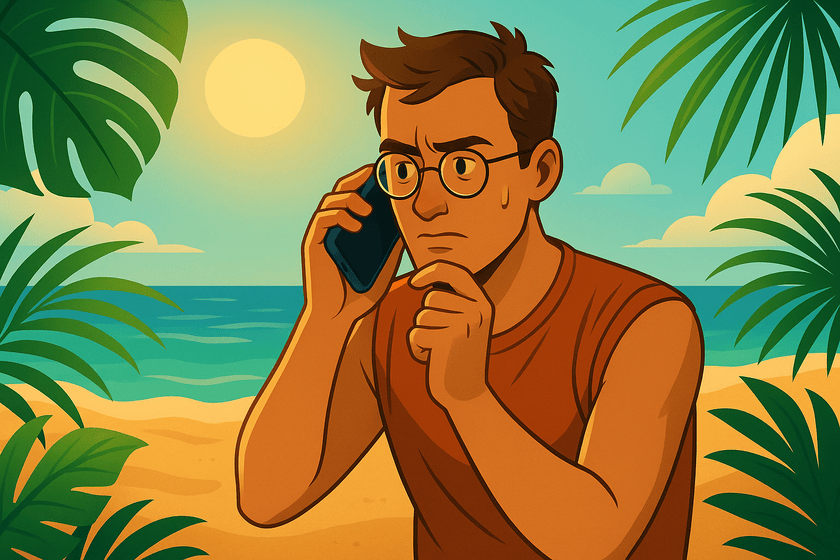

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [10]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [11]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
titanic_df.shape

(891, 11)

In [20]:
titanic_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,793.000000
mean,0.383838,29.699118,0.523008,0.381594,33.123938
std,0.486592,14.526497,1.102743,0.806057,51.578312
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,6.000000,512.329200


Sprawdzę najpierw, czy wartości są unikalne w obrębie kolumn i czy nie ma konieczności ich podmianki

In [13]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

In [15]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
titanic_df['Survived'].unique()

array([0, 1])

In [17]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Wniosek: w danych kategorialnych nie występują błędnie wprowadzone nazwy kategorii, za to występują braki w nazwie portu, z którego wsiadł pasażer

In [22]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

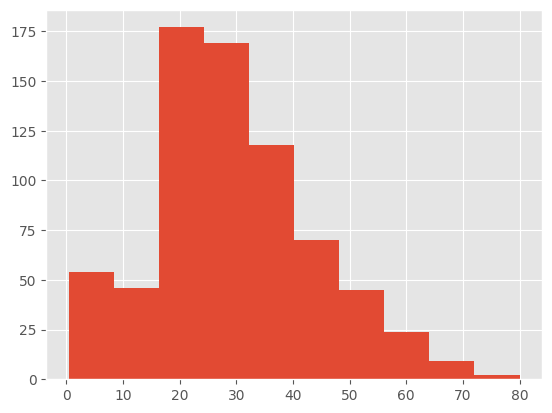

In [29]:
plt.hist(titanic_df['Age'])

Rozkład nie przypomina normalnego, w związku z powyższym niezbyt dobrym pomysłem wydaje się zastąpić brakujące wartości wieku średnią, dużo lepiej będzie zastąpić je medianą.

In [30]:
age_median = titanic_df["Age"].median()
titanic_df["Age"].fillna(age_median, inplace=True)

C:\Users\jakub\AppData\Local\Temp\ipykernel_13488\3746785401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Age"].fillna(age_median, inplace=True)


In [31]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64

(array([648.,  96.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

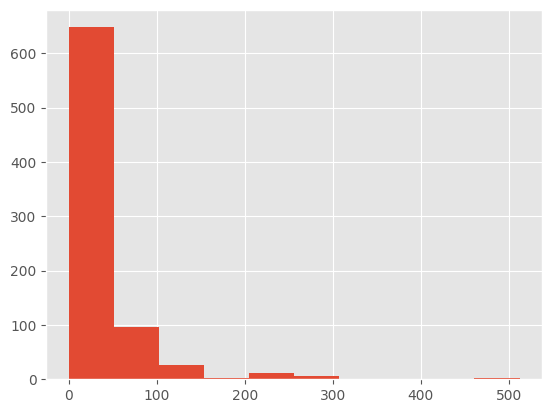

In [33]:
plt.hist(titanic_df['Fare'])

Zdaje się, że tu najlepiej brakującą wartość wypełni się modą

In [ ]:
fare_mode = titanic_df["Fare"].mode()[0] #jak coś to zauważyłem że tu nie zwraca pojedynczej wartości tylko chyba krotkę (?) więc wyciągnąłem pierwszą wartość
titanic_df["Fare"].fillna(fare_mode, inplace=True)

C:\Users\jakub\AppData\Local\Temp\ipykernel_13488\3778188432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Fare"].fillna(fare_mode, inplace=True)


In [38]:
print(titanic_df["Fare"].mode())

0    13.0
Name: Fare, dtype: float64


In [37]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Pozostało jeszcze ogarnąć kabinę i port. W przypadku tego pierwszego, moim zdaniem najlepiej będzie zastąpić ją wartością Unknown, bo nie jesteśmy w stanie tej kabiny w żaden sposób wyestymować, a mimo to nie warto usuwać z tego powodu całego wiersza, ponieważ reszta kolumn niesie za sobą dodatkową wartość pod kątem nabytej wiedzy. Ponadto użytkownik może nie mieć swojej kabiny, więc wiedza o braku uzupełnionej kabiny również niesie wartość. W przypadku Embarked skorzystam z opcji usunięcia całej serii danych, gdyż brak dwóch rekordów nie wpłynie znacząco na jakość prezentacji, a też nie widzę żadnego sposobu, który mógłby skutecznie wypełnić tę lukę.

In [39]:
titanic_df["Cabin"].fillna("Unknown", inplace=True)
titanic_df.dropna(subset="Embarked", inplace= True)

C:\Users\jakub\AppData\Local\Temp\ipykernel_13488\3204692435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Cabin"].fillna("Unknown", inplace=True)


In [40]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Wszystko działa! :D Teraz zajmę się dodawaniem dodatkowych kolumn. Z racji, że wszystkie przemyślenia piszę ad hoc i nie modyfikuję później tych markdownów, wstępna strategia jest taka:
- dodać kolumnę "Relatives" oznaczającą liczbę wszystkich bliskich zabranych na pokład
- dodać kolumnę "isAlone" oznaczającą czy dany pasażer zabrał jakichkolwiek bliskich na pokład
- dodać flagę "knownCabin" oznaczającą, czy dany użytkownik posiada znaną nam własną kabinę

In [48]:
titanic_df["Relatives"] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_df[["Name", "Relatives"]]

,Name,Relatives
PassengerId,,
1,"Braund, Mr. Owen Harris",1
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
3,"Heikkinen, Miss. Laina",0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
5,"Allen, Mr. William Henry",0
...,...,...
887,"Montvila, Rev. Juozas",0
888,"Graham, Miss. Margaret Edith",0
889,"Johnston, Miss. Catherine Helen ""Carrie""",3


In [51]:
titanic_df["isAlone"] = (titanic_df["Relatives"] == 0).astype(int)
titanic_df[["Name", "isAlone"]]

,Name,isAlone
PassengerId,,
1,"Braund, Mr. Owen Harris",0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
3,"Heikkinen, Miss. Laina",1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
5,"Allen, Mr. William Henry",1
...,...,...
887,"Montvila, Rev. Juozas",1
888,"Graham, Miss. Margaret Edith",1
889,"Johnston, Miss. Catherine Helen ""Carrie""",0


In [58]:
titanic_df["hasCabin"] = np.where(titanic_df["Cabin"] == "Unknown", 0, 1)
titanic_df[["Cabin", "hasCabin"]]

,Cabin,hasCabin
PassengerId,,
1,Unknown,0
2,C85,1
3,Unknown,0
4,C123,1
5,Unknown,0
...,...,...
887,Unknown,0
888,B42,1
889,Unknown,0


In [65]:
ranges = [0, 12, 18, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young adult', 'Adult', 'Senior']
titanic_df['ageGroup'] = pd.cut(titanic_df['Age'], bins=ranges, labels=labels, right=False)

titanic_df[["Name", "ageGroup"]]

,Name,ageGroup
PassengerId,,
1,"Braund, Mr. Owen Harris",Young adult
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult
3,"Heikkinen, Miss. Laina",Young adult
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Adult
5,"Allen, Mr. William Henry",Adult
...,...,...
887,"Montvila, Rev. Juozas",Young adult
888,"Graham, Miss. Margaret Edith",Young adult
889,"Johnston, Miss. Catherine Helen ""Carrie""",Young adult


## Kodowanie cech

In [66]:
# ordinar encoding

cabin_mapping = {
    "C" : 1,
    "Q" : 2,
    "S" : 3,
    "Unknown": 0
}

age_groups_mapping = {
    "Child": 0,
    "Teenager": 1,
    "Young Adult": 2,
    "Adult": 3,
    "Senior": 4
}

gender_mapping = {
    "male" : 0,
    "female" : 1
}

In [67]:
titanic_df['Cabin'] = titanic_df['Cabin'].map(cabin_mapping)
titanic_df['ageGroup'] = titanic_df['ageGroup'].map(age_groups_mapping)
titanic_df['Sex'] = titanic_df['Sex'].map(gender_mapping)

## Detekcja outlierów

In [68]:
titanic_df["Age"].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [70]:
#pozwolę sobie ukraść to ze ściągi

def boxplot(df, column_name):
    """
    Displays a boxplot of the choosen column to show its distribution.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

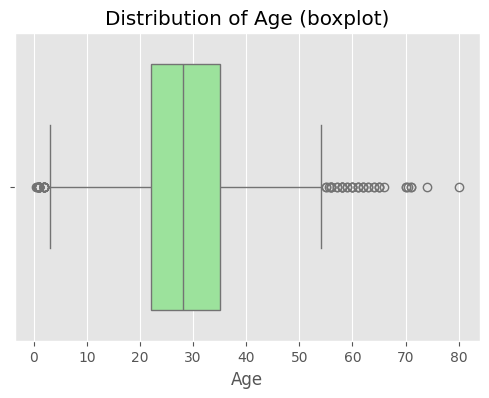

In [71]:
boxplot(titanic_df, "Age")

Wieku powyżej max nie uznaję mimo wszystko za outliery - to dość naturalne, że również seniorzy uczestniczyli w rejsie, z resztą mamy dla nich dedykowaną kategorię. Problemem jednak jest wiek do jednego roku, który zasługuje na osobną kategorię.

In [73]:
ranges = [0, 1, 12, 18, 35, 60, np.inf]
labels = [0, 1, 2, 3, 4, 5]
titanic_df['ageGroup'] = pd.cut(titanic_df['Age'], bins=ranges, labels=labels, right=False)

titanic_df[["Name", "ageGroup"]]

,Name,ageGroup
PassengerId,,
1,"Braund, Mr. Owen Harris",3
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4
3,"Heikkinen, Miss. Laina",3
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4
5,"Allen, Mr. William Henry",4
...,...,...
887,"Montvila, Rev. Juozas",3
888,"Graham, Miss. Margaret Edith",3
889,"Johnston, Miss. Catherine Helen ""Carrie""",3


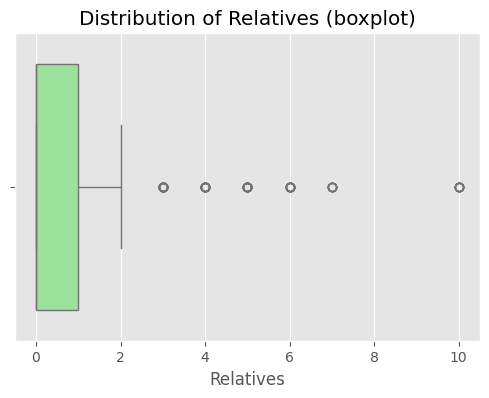

In [74]:
boxplot(titanic_df, "Relatives")

wygląda git

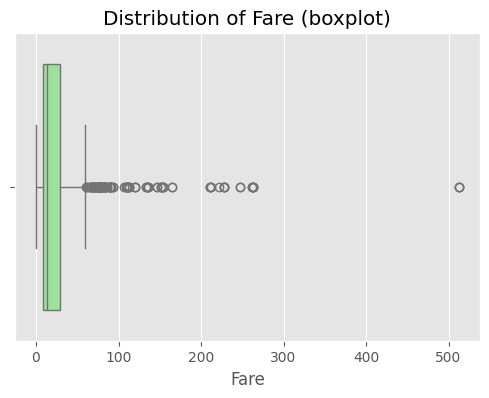

In [75]:
boxplot(titanic_df, "Fare")

Zastanawiam się nad przypadkiem zapłacenia ponad 500 euro za bilet. Możliwe, że było to totalne last minute, ale możliwe też, że to źle wpisana wartość (dużo osób kupiło bilet po 50euro), więc na wszelki wypadek, by model nie był czuły na tę wartość, zastąpię ją średnią.

In [76]:
titanic_df["Fare"].max()

np.float64(512.3292)

In [77]:
titanic_df.loc[titanic_df['Fare'] == 512.3292, 'Fare'] = titanic_df[titanic_df['Fare'] < 500]['Fare'].mean()
titanic_df["Fare"].max()

np.float64(263.0)

In [79]:
#znowu kradnę, ale kto by nie skorzystał?
def scatterplot(column_name, row_name):
    """
    Plots a scatterplot between the chosen column and 'charges'.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot against 'charges'.
    Returns:
        None. Displays the scatterplot.
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=titanic_df, x=column_name, y=row_name, color='darkorange', alpha=0.6)
    plt.title(f'{column_name} vs {row_name}')
    plt.xlabel(column_name)
    plt.ylabel(row_name)
    plt.tight_layout()
    plt.show()

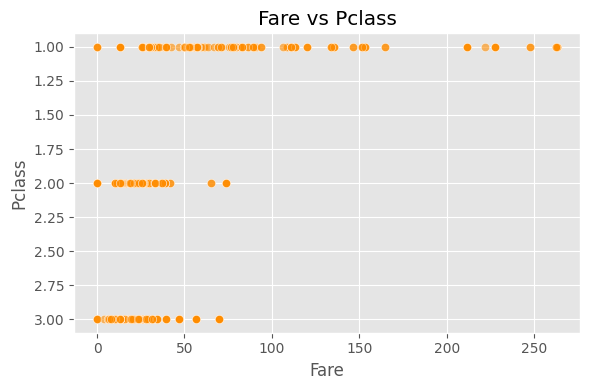

In [ ]:
scatterplot("Fare", "Pclass") # nie wyszło, ale chciałem udokumentować proces

C:\Users\jakub\AppData\Local\Temp\ipykernel_13488\2369079653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_df, x="Pclass", y="Fare", palette="Set2")


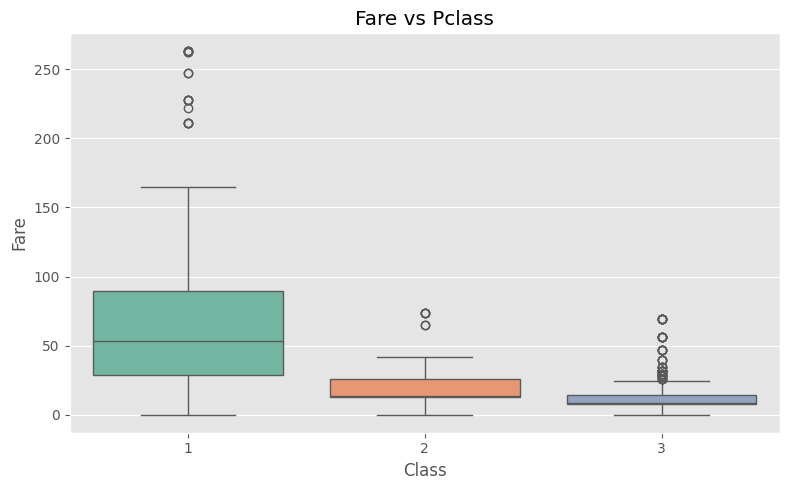

In [118]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_df, x="Pclass", y="Fare", palette="Set2")
plt.title("Fare vs Pclass")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

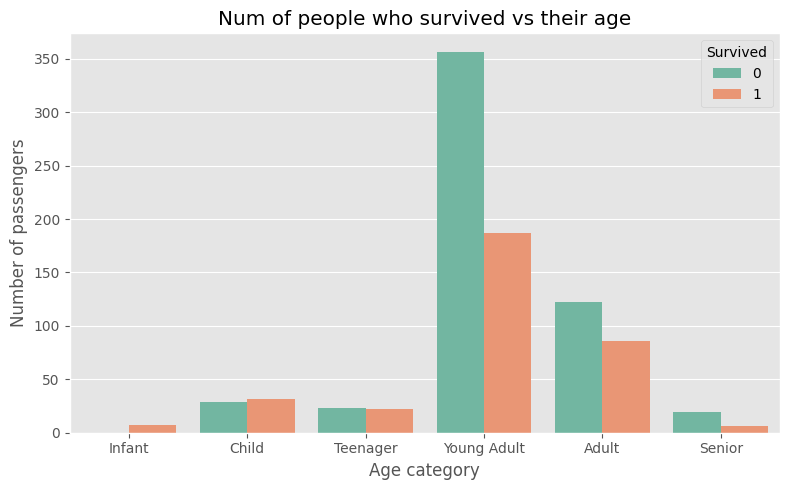

In [107]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_df, x="ageGroup", hue="Survived", palette="Set2")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
plt.title("Num of people who survived vs their age")
plt.xlabel("Age category")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

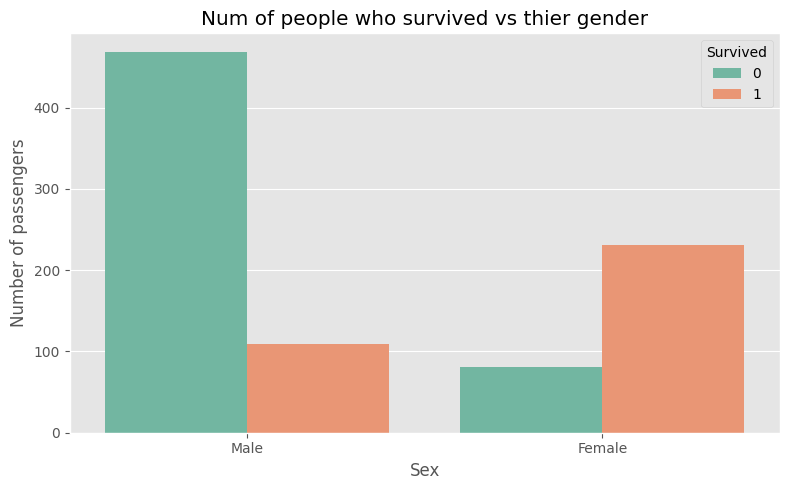

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_df, x="Sex", hue="Survived", palette="Set2")
plt.title("Num of people who survived vs thier gender")
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

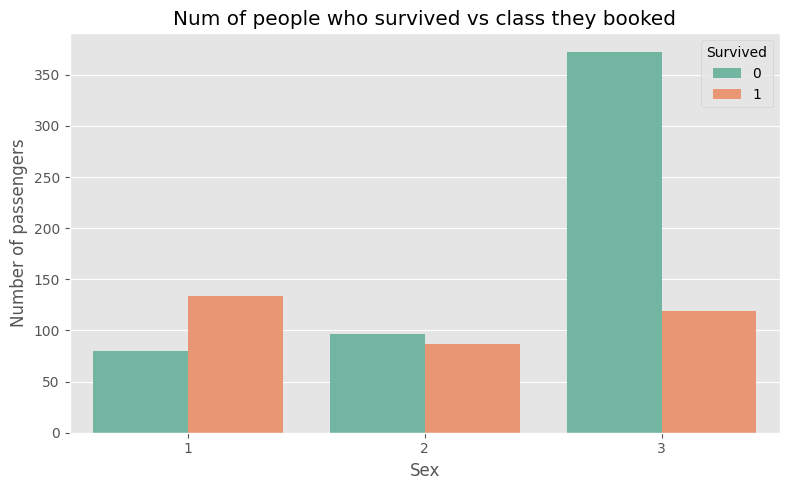

In [111]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_df, x="Pclass", hue="Survived", palette="Set2")
plt.title("Num of people who survived vs class they booked")
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

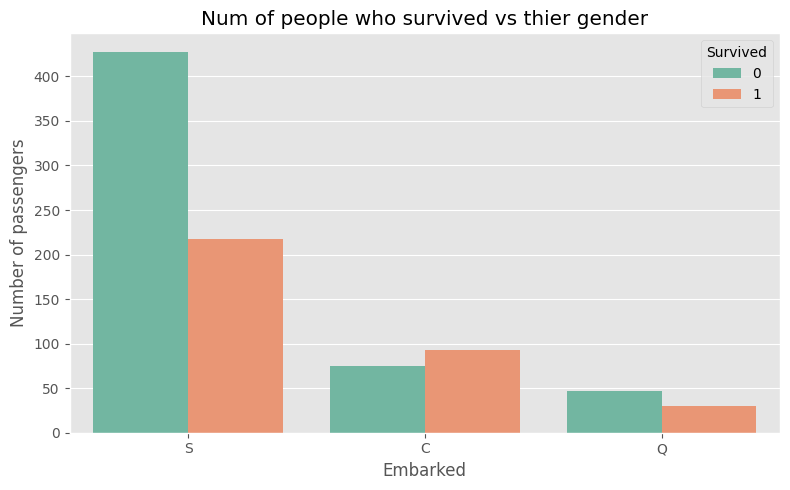

In [114]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_df, x="Embarked", hue="Survived", palette="Set2")
plt.title("Num of people who survived vs thier gender")
plt.xlabel("Embarked")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

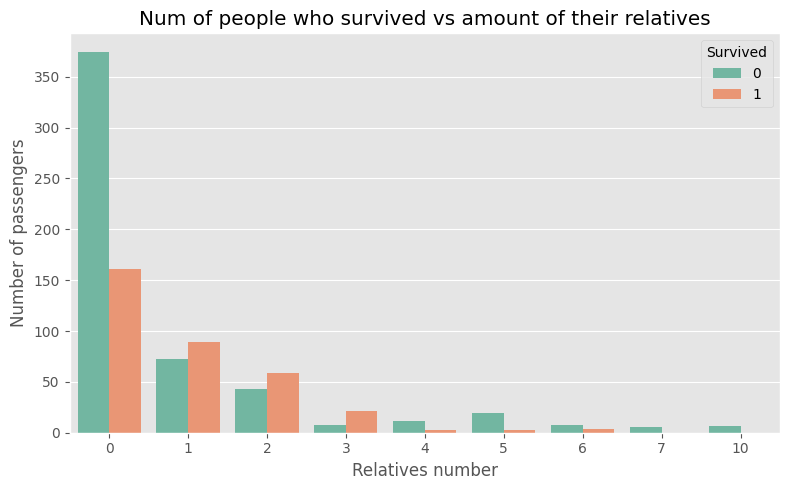

In [119]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_df, x="Relatives", hue="Survived", palette="Set2")
plt.title("Num of people who survived vs amount of their relatives")
plt.xlabel("Relatives number")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

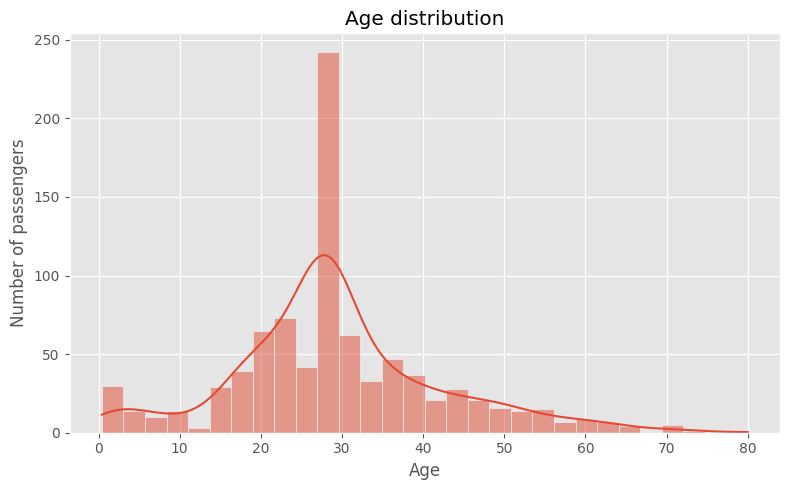

In [121]:
plt.figure(figsize=(8,5))
sns.histplot(data=titanic_df, x="Age", bins=30, kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

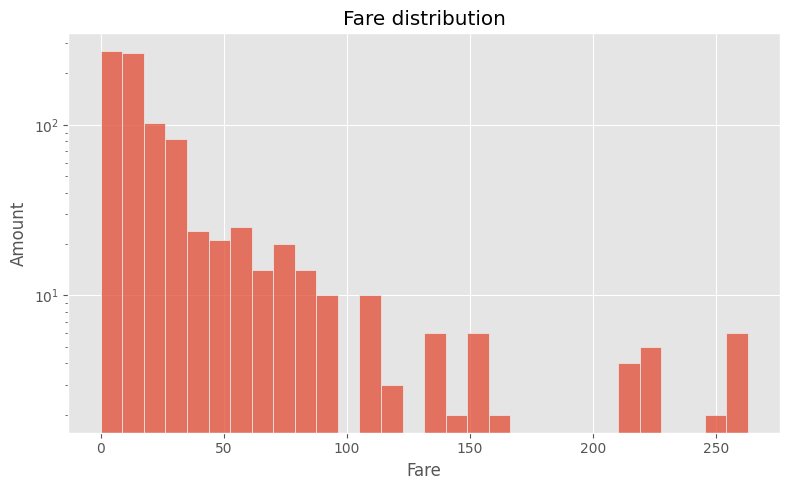

In [122]:
plt.figure(figsize=(8,5))
sns.histplot(data=titanic_df, x="Fare", bins=30)
plt.yscale("log") # dałem log żeby ogon nie był za długi
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

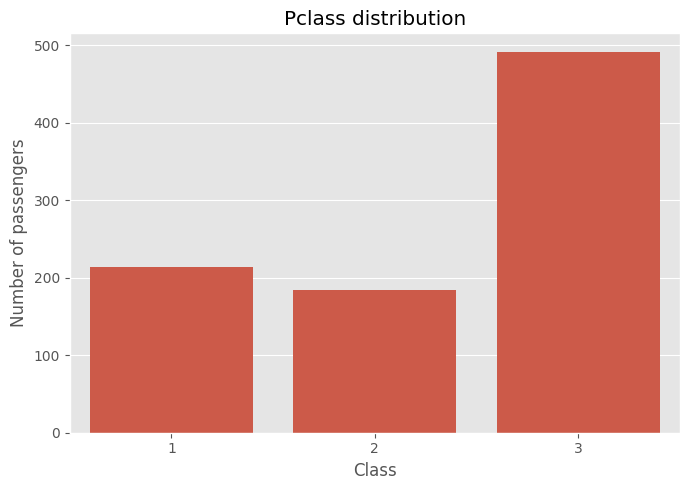

In [124]:
plt.figure(figsize=(7,5))
sns.countplot(data=titanic_df, x="Pclass")
plt.title("Pclass distribution")
plt.xlabel("Class")
plt.ylabel("Number of passengers")
plt.tight_layout()
plt.show()

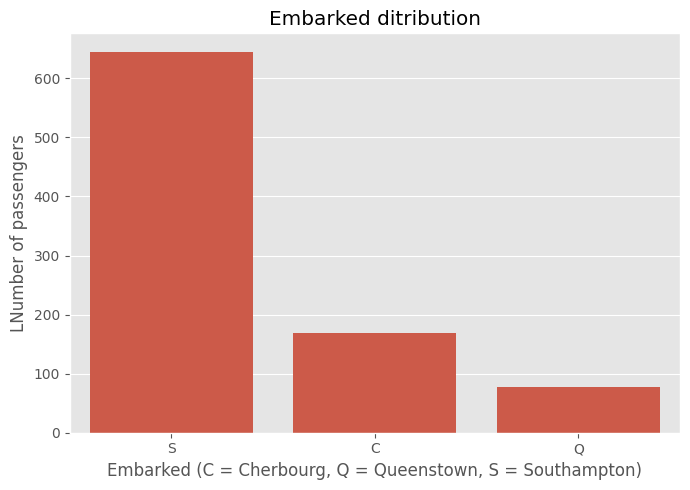

In [125]:
plt.figure(figsize=(7,5))
sns.countplot(data=titanic_df, x="Embarked")
plt.title("Embarked ditribution")
plt.xlabel("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("LNumber of passengers")
plt.tight_layout()
plt.show()

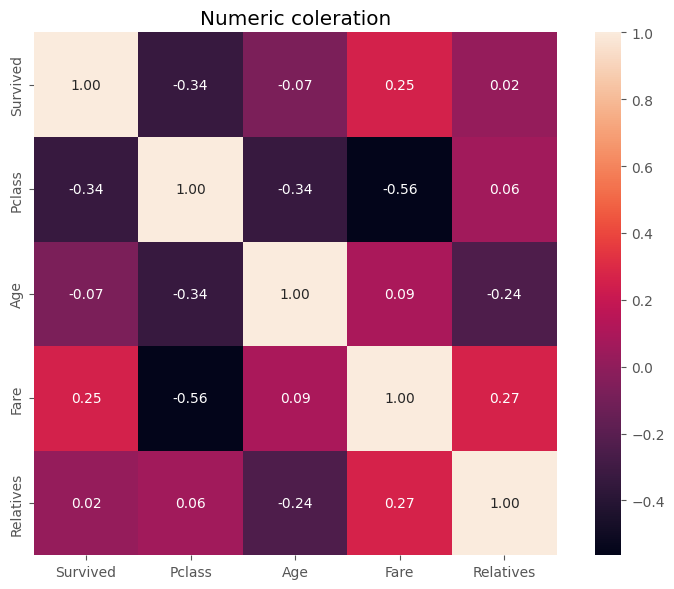

In [131]:
cols_to_corr = ["Survived", "Pclass", "Age", "Fare", "Relatives"]
num_corr = titanic_df[cols_to_corr].corr(method="pearson")

plt.figure(figsize=(8,6))
sns.heatmap(num_corr, annot=True, fmt=".2f", square=True)
plt.title("Numeric coleration")
plt.tight_layout()
plt.show()

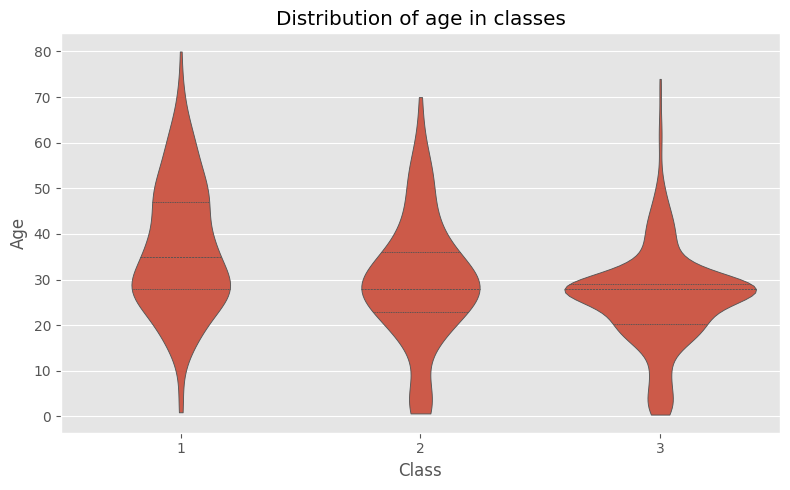

In [130]:
plt.figure(figsize=(8,5))
sns.violinplot(data=titanic_df, x="Pclass", y="Age", inner="quartile", cut=0)
plt.title("Distribution of age in classes")
plt.xlabel("Class")
plt.ylabel("Age")
plt.tight_layout()
plt.show()